In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [69]:
# loading data
o_df = pd.read_csv('population.csv',skiprows=1)
di_df = pd.read_csv('disability.csv',skiprows = 1)

In [71]:
print(di_df.head)

<bound method NDFrame.head of     Table Name  State Code  Distt.Code                     Area Name  \
0          NaN         NaN         NaN                           NaN   
1          NaN         NaN         NaN                           NaN   
2          NaN         NaN         NaN                           NaN   
3        C4920        20.0         0.0               State-JHARKHAND   
4        C4920        20.0         0.0               State-JHARKHAND   
..         ...         ...         ...                           ...   
973      C4920        20.0       369.0  District-Saraikela-Kharsawan   
974      C4920        20.0       369.0  District-Saraikela-Kharsawan   
975      C4920        20.0       369.0  District-Saraikela-Kharsawan   
976      C4920        20.0       369.0  District-Saraikela-Kharsawan   
977      C4920        20.0       369.0  District-Saraikela-Kharsawan   

    Total/Rural/Urban       Age-group Total number of disabled persons  \
0                 NaN          

In [73]:
print(o_df)

     Table State Distt.      Town           Area Name       Age-group  \
0     Name  Code   Code      Code                 NaN             NaN   
1      NaN   NaN    NaN       NaN                 NaN             NaN   
2      NaN   NaN    NaN       NaN                 NaN               1   
3      NaN   NaN    NaN       NaN                 NaN             NaN   
4      NaN   NaN    NaN       NaN                 NaN             NaN   
..     ...   ...    ...       ...                 ...             ...   
494  C4114    20     18  41802000  Jamshedpur (NA+OG)           65-69   
495  C4114    20     18  41802000  Jamshedpur (NA+OG)           70-74   
496  C4114    20     18  41802000  Jamshedpur (NA+OG)           75-79   
497  C4114    20     18  41802000  Jamshedpur (NA+OG)             80+   
498  C4114    20     18  41802000  Jamshedpur (NA+OG)  Age not stated   

      Total  Unnamed: 7 Unnamed: 8    Rural  ... Unnamed: 29 Unnamed: 30  \
0        NaN        NaN        NaN      NaN  ..

## cleaning data

In [76]:
o_df = o_df.dropna(axis = 1, how='all')
o_df.columns

Index(['Table', 'State', 'Distt.', 'Town', 'Area Name', 'Age-group', 'Total ',
       'Unnamed: 7', 'Unnamed: 8', 'Rural', 'Unnamed: 10', 'Unnamed: 11',
       'Urban', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [78]:
co_df = o_df[['Area Name', 'Age-group']]
ru_df = o_df[['Total ','Rural']]
nu_df = pd.concat([co_df,ru_df],axis = 1)
nu_df = nu_df.iloc[5:]

In [80]:
nu_df

,Area Name,Age-group,Total,Rural
5,JHARKHAND,All ages,26945829,20952088
6,JHARKHAND,0-4,3269645,2710437
7,JHARKHAND,5-9,3904096,3198507
8,JHARKHAND,10-14,3534953,2755312
9,JHARKHAND,15-19,2499650,1815202
...,...,...,...,...
494,Jamshedpur (NA+OG),65-69,10666,0
495,Jamshedpur (NA+OG),70-74,7052,0
496,Jamshedpur (NA+OG),75-79,3866,0
497,Jamshedpur (NA+OG),80+,4663,0


In [82]:
nu_df['Area Name'].unique()

array(['JHARKHAND', 'Garhwa *', 'Palamu', 'Chatra *', 'Hazaribag',
       'Hazaribag (M)', 'Kodarma *', 'Giridih', 'Deoghar', 'Godda',
       'Sahibganj', 'Pakaur *', 'Dumka', 'Dhanbad', 'Dhanbad (M)',
       'Bokaro *', 'Bokaro Steel City (CT)', 'Ranchi', 'Ranchi (M Corp.)',
       'Lohardaga', 'Gumla', 'Pashchimi Singhbhum', 'Adityapur (NA)',
       'Purbi Singhbhum', 'Mango (NA)', 'Jamshedpur (NA+OG)'],
      dtype=object)

* match names of districts with the names with other dataset  *

In [85]:
mapping = {
    'JHARKHAND': 'State-JHARKHAND',
    'Garhwa *': 'District-Garhwa',
    'Palamu': 'District-Palamu',
    'Chatra *': 'District-Chatra',
    'Hazaribag': 'District-Hazaribagh',
    'Hazaribag (M)': 'District-Hazaribagh',
    'Kodarma *': 'District-Kodarma',
    'Giridih': 'District-Giridih',
    'Deoghar': 'District-Deoghar',
    'Godda': 'District-Godda',
    'Sahibganj': 'District-Sahibganj',
    'Pakaur *': 'District-Pakur',
    'Dumka': 'District-Dumka',
    'Dhanbad': 'District-Dhanbad',
    'Dhanbad (M)': 'District-Dhanbad',
    'Bokaro *': 'District-Bokaro',
    'Bokaro Steel City (CT)': 'District-Bokaro',
    'Ranchi': 'District-Ranchi',
    'Ranchi (M Corp.)': 'District-Ranchi',
    'Lohardaga': 'District-Lohardaga',
    'Gumla': 'District-Gumla',
    'Pashchimi Singhbhum': 'District-Pashchimi Singhbhum',
    'Adityapur (NA)': 'District-Pashchimi Singhbhum',
    'Purbi Singhbhum': 'District-Purbi Singhbhum',
    'Mango (NA)': 'District-Purbi Singhbhum',
    'Jamshedpur (NA+OG)': 'District-Purbi Singhbhum'
}

nu_df['Area Name'] = nu_df['Area Name'].replace(mapping)

In [87]:
nu_df

,Area Name,Age-group,Total,Rural
5,State-JHARKHAND,All ages,26945829,20952088
6,State-JHARKHAND,0-4,3269645,2710437
7,State-JHARKHAND,5-9,3904096,3198507
8,State-JHARKHAND,10-14,3534953,2755312
9,State-JHARKHAND,15-19,2499650,1815202
...,...,...,...,...
494,District-Purbi Singhbhum,65-69,10666,0
495,District-Purbi Singhbhum,70-74,7052,0
496,District-Purbi Singhbhum,75-79,3866,0
497,District-Purbi Singhbhum,80+,4663,0


In [89]:
nu_df['Age-group'].unique()

array(['All ages', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29',
       '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80+', 'Age not stated'], dtype=object)

In [91]:
nu_df['Area Name'].unique()

array(['State-JHARKHAND', 'District-Garhwa', 'District-Palamu',
       'District-Chatra', 'District-Hazaribagh', 'District-Kodarma',
       'District-Giridih', 'District-Deoghar', 'District-Godda',
       'District-Sahibganj', 'District-Pakur', 'District-Dumka',
       'District-Dhanbad', 'District-Bokaro', 'District-Ranchi',
       'District-Lohardaga', 'District-Gumla',
       'District-Pashchimi Singhbhum', 'District-Purbi Singhbhum'],
      dtype=object)

In [93]:
nu_df.head()

,Area Name,Age-group,Total,Rural
5,State-JHARKHAND,All ages,26945829,20952088
6,State-JHARKHAND,0-4,3269645,2710437
7,State-JHARKHAND,5-9,3904096,3198507
8,State-JHARKHAND,10-14,3534953,2755312
9,State-JHARKHAND,15-19,2499650,1815202


In [99]:
nu_df = nu_df.groupby(['Area Name', 'Age-group'], as_index=False)[['Total ','Rural']].sum()
nu_df.to_csv('nuu_df.csv')

# working with disability dataset

In [109]:
adi_df = di_df[['Area Name','Age-group','Total/Rural/Urban']]
todi_df = di_df.loc[:,'Total number of disabled persons':'In seeing'].iloc[:,:-1]

In [111]:
todi_df.head(10)

,Total number of disabled persons,Unnamed: 7,Unnamed: 8
0,Persons,Males,Females
1,1,2,3
2,NaN,NaN,NaN
3,"769,980","426,876","343,104"
4,"46,455","24,406","22,049"
5,"67,427","36,416","31,011"
6,"144,770","79,989","64,781"
7,"111,923","63,708","48,215"
8,"95,138","55,563","39,575"
9,"83,172","49,573","33,599"


In [203]:
total_dis_df = pd.concat([adi_df,tot_di_df],axis = 1)
total_dis_df = total_dis_df[3:].reset_index(drop=True)
total_dis_df

,Area Name,Age-group,Total/Rural/Urban,Total number of disabled persons,Unnamed: 7,Unnamed: 8
0,State-JHARKHAND,Total,Total,"769,980","426,876","343,104"
1,State-JHARKHAND,0-4,Total,"46,455","24,406","22,049"
2,State-JHARKHAND,5-9,Total,"67,427","36,416","31,011"
3,State-JHARKHAND,10-19,Total,"144,770","79,989","64,781"
4,State-JHARKHAND,20-29,Total,"111,923","63,708","48,215"
...,...,...,...,...,...,...
970,District-Saraikela-Kharsawan,60-69,Urban,471,269,202
971,District-Saraikela-Kharsawan,70-79,Urban,246,125,121
972,District-Saraikela-Kharsawan,80-89,Urban,82,33,49
973,District-Saraikela-Kharsawan,90+,Urban,27,13,14


In [205]:
total_dis_df.columns = ['Area Name', 'Age-group','Total/Rural/Urban','People_with_disability_TOTAL','People_with_disability_MALE',
                        'People_with_disability_FEMALE']
total_dis_df.head(10)

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL,People_with_disability_MALE,People_with_disability_FEMALE
0,State-JHARKHAND,Total,Total,"769,980","426,876","343,104"
1,State-JHARKHAND,0-4,Total,"46,455","24,406","22,049"
2,State-JHARKHAND,5-9,Total,"67,427","36,416","31,011"
3,State-JHARKHAND,10-19,Total,"144,770","79,989","64,781"
4,State-JHARKHAND,20-29,Total,"111,923","63,708","48,215"
5,State-JHARKHAND,30-39,Total,"95,138","55,563","39,575"
6,State-JHARKHAND,40-49,Total,"83,172","49,573","33,599"
7,State-JHARKHAND,50-59,Total,"70,032","39,482","30,550"
8,State-JHARKHAND,60-69,Total,"82,083","42,582","39,501"
9,State-JHARKHAND,70-79,Total,"45,933","23,450","22,483"


<Axes: >

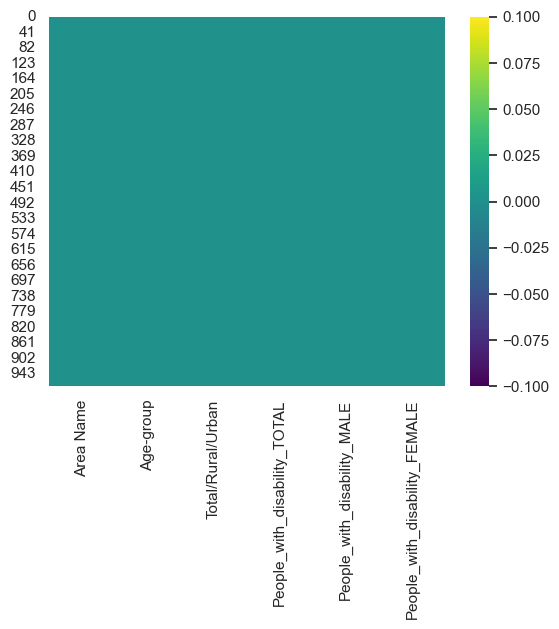

In [207]:
sns.heatmap(total_dis_df.isnull(),cmap='viridis')

In [209]:
total_dis_df.isnull()

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL,People_with_disability_MALE,People_with_disability_FEMALE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
970,False,False,False,False,False,False
971,False,False,False,False,False,False
972,False,False,False,False,False,False
973,False,False,False,False,False,False


In [211]:
total_dis_df.head(20)

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL,People_with_disability_MALE,People_with_disability_FEMALE
0,State-JHARKHAND,Total,Total,"769,980","426,876","343,104"
1,State-JHARKHAND,0-4,Total,"46,455","24,406","22,049"
2,State-JHARKHAND,5-9,Total,"67,427","36,416","31,011"
3,State-JHARKHAND,10-19,Total,"144,770","79,989","64,781"
4,State-JHARKHAND,20-29,Total,"111,923","63,708","48,215"
5,State-JHARKHAND,30-39,Total,"95,138","55,563","39,575"
6,State-JHARKHAND,40-49,Total,"83,172","49,573","33,599"
7,State-JHARKHAND,50-59,Total,"70,032","39,482","30,550"
8,State-JHARKHAND,60-69,Total,"82,083","42,582","39,501"
9,State-JHARKHAND,70-79,Total,"45,933","23,450","22,483"


In [213]:
total_dis_df.describe().transpose()

,count,unique,top,freq
Area Name,975,25,State-JHARKHAND,39
Age-group,975,13,Total,75
Total/Rural/Urban,975,3,Total,325
People_with_disability_TOTAL,975,816,6,6
People_with_disability_MALE,975,745,0,13
People_with_disability_FEMALE,975,729,1,12


In [215]:
total_dis_df['Area Name'].unique()

array(['State-JHARKHAND', 'District-Garhwa ', 'District-Chatra',
       'District-Kodarma', 'District-Giridih', 'District-Deoghar',
       'District-Godda', 'District-Sahibganj', 'District-Pakur',
       'District-Dhanbad', 'District-Bokaro', 'District-Lohardaga',
       'District-Purbi Singhbhum', 'District-Palamu', 'District-Latehar',
       'District-Hazaribagh', 'District-Ramgarh', 'District-Dumka',
       'District-Jamtara', 'District-Ranchi', 'District-Khunti',
       'District-Gumla', 'District-Simdega',
       'District-Pashchimi Singhbhum', 'District-Saraikela-Kharsawan'],
      dtype=object)

In [217]:
total_dis_df['Age-group'].unique()

array(['Total', '0-4', '5-9', '10-19', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80-89', '90+', 'Age Not Stated'], dtype=object)

# Analysis

### Total disabled persons district wise

In [231]:
# creating relevant dataset
total_a_df = total_dis_df.loc[:,:'People_with_disability_TOTAL']

In [233]:
total_a_df.head()

,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL
0,State-JHARKHAND,Total,Total,"769,980"
1,State-JHARKHAND,0-4,Total,"46,455"
2,State-JHARKHAND,5-9,Total,"67,427"
3,State-JHARKHAND,10-19,Total,"144,770"
4,State-JHARKHAND,20-29,Total,"111,923"


In [235]:
total_a_df = total_a_df[(total_a_df['Age-group']=='Total')&(total_a_df['Total/Rural/Urban']=='Total')].reset_index()
total_a_df

,index,Area Name,Age-group,Total/Rural/Urban,People_with_disability_TOTAL
0,0,State-JHARKHAND,Total,Total,"769,980"
1,39,District-Garhwa,Total,Total,"26,271"
2,78,District-Chatra,Total,Total,"17,699"
3,117,District-Kodarma,Total,Total,"10,195"
4,156,District-Giridih,Total,Total,"49,208"
5,195,District-Deoghar,Total,Total,"47,613"
6,234,District-Godda,Total,Total,"51,496"
7,273,District-Sahibganj,Total,Total,"36,613"
8,312,District-Pakur,Total,Total,"20,760"
9,351,District-Dhanbad,Total,Total,"67,300"


In [239]:
nu_df.head()

,Area Name,Age-group,Rural
0,District-Bokaro,0-4,1169730
1,District-Bokaro,10-14,1262020
2,District-Bokaro,15-19,873760
3,District-Bokaro,20-24,760740
4,District-Bokaro,25-29,778670


In [197]:
sns.set_theme(style = 'darkgrid')
sns.barplot()